In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from fredapi import Fred

In [3]:
pd.set_option('display.max_columns',None)
plt.style.use ('fivethirtyeight')
colour_palete= plt.rcParams ['axes.prop_cycle'].by_key()['color']

In [4]:
import os 
from dotenv import load_dotenv
load_dotenv()
API_KEY = os.getenv ('API_KEY_fred')

# 1. Create fred object 

In [5]:
fred = Fred(api_key=API_KEY)

# 2. search for economic data 

In [6]:
fred.search('S&P',order_by= 'popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-11-25,2024-11-25,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:51:14-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-11-25,2024-11-25,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-11-25,2024-11-25,S&P 500,2014-11-24,2024-11-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-22 19:11:30-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-11-25,2024-11-25,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:51:16-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-11-25,2024-11-25,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:57:07-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-11-25,2024-11-25,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-11-25,2024-11-25,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2024-11-25,2024-11-25,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


# 3. Feach data 

In [7]:
SP500_df = fred.get_series(series_id='SP500')
SP500_df

2014-11-24    2069.41
2014-11-25    2067.03
2014-11-26    2072.83
2014-11-27        NaN
2014-11-28    2067.56
               ...   
2024-11-18    5893.62
2024-11-19    5916.98
2024-11-20    5917.11
2024-11-21    5948.71
2024-11-22    5969.34
Length: 2610, dtype: float64

<Axes: title={'center': 'SP500'}>

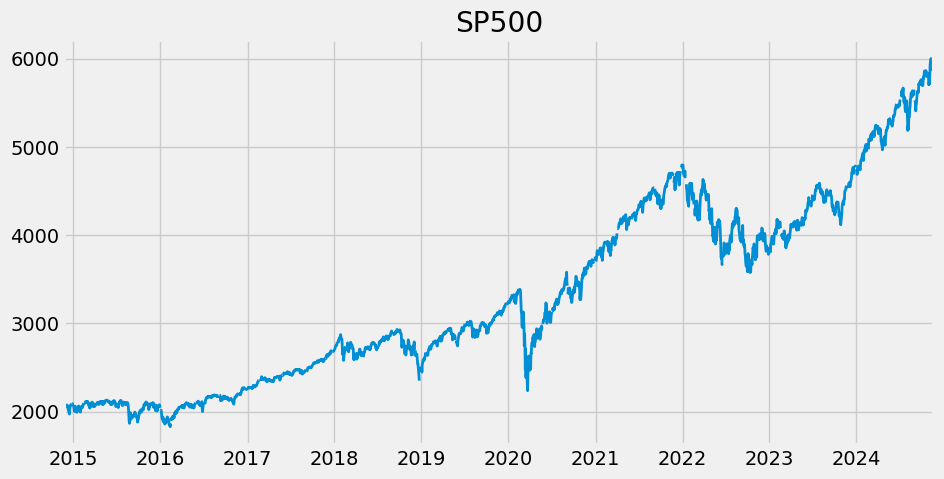

In [8]:
SP500_df.plot(figsize=(10,5),title='SP500',lw=2)

# 4. Fetach and merge data 

In [9]:
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-25,2024-11-25,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-11-25,2024-11-25,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:03-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-11-25,2024-11-25,Unemployment Level,1948-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-11-01 07:47:06-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-11-25,2024-11-25,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-11-25,2024-11-25,Continued Claims (Insured Unemployment),1967-01-07,2024-11-09,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-11-21 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-11-25,2024-11-25,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-11-25,2024-11-25,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-11-25,2024-11-25,Unemployment Rate - Married Women,1955-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:30-05:00,9,To obtain estimates of women worker employment...


In [10]:
unemployment_level = fred.get_series(series_id='UNEMPLOY')

unemployment_level 

1948-01-01    2034.0
1948-02-01    2328.0
1948-03-01    2399.0
1948-04-01    2386.0
1948-05-01    2118.0
               ...  
2024-06-01    6811.0
2024-07-01    7163.0
2024-08-01    7115.0
2024-09-01    6834.0
2024-10-01    6984.0
Length: 922, dtype: float64

<Axes: title={'center': 'unemployment level'}>

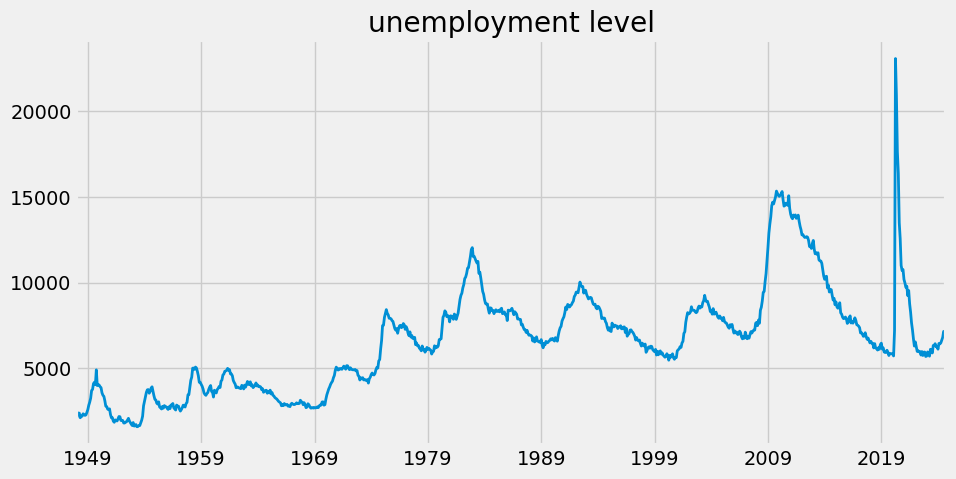

In [11]:
unemployment_level.plot(figsize=(10,5),title='unemployment level', lw= 2)

In [12]:
unemployment_rate_state = fred.search('unemployment rate state', filter= ('frequency','Monthly') )

unemployment_rate_state 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-25,2024-11-25,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-11-25,2024-11-25,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:03-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-11-25,2024-11-25,Unemployment Rate - Black or African American,1972-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:04-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-11-25,2024-11-25,Unemployment Level,1948-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-11-01 07:47:06-05:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2024-11-25,2024-11-25,Unemployment Level,1948-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2024-11-01 07:46:18-05:00,27,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INBART5URN,INBART5URN,2024-11-25,2024-11-25,"Unemployment Rate in Bartholomew County, IN",1990-01-01,2024-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-10-30 10:26:10-05:00,2,These data come from the Current Population Su...
MOPRURN,MOPRURN,2024-11-25,2024-11-25,"Unemployment Rate in Perry County, MO",1990-01-01,2024-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-10-30 10:13:27-05:00,2,These data come from the Current Population Su...
PENS812UR,PENS812UR,2024-11-25,2024-11-25,Unemployment Rate in Pensacola-Ferry Pass-Bren...,1990-01-01,2024-09-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-10-30 13:32:18-05:00,1,None


In [13]:
unemployment_rate_state_seasonaly= unemployment_rate_state.query('seasonal_adjustment=="Seasonally Adjusted" and units == "Percent"')

unemployment_rate_state_seasonaly

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-25,2024-11-25,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-11-25,2024-11-25,Unemployment Rate - Black or African American,1972-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:04-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-11-25,2024-11-25,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:08-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-11-25,2024-11-25,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
TXUR,TXUR,2024-11-25,2024-11-25,Unemployment Rate in Texas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:03-06:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M08311USM156SNBR,M08311USM156SNBR,2024-11-25,2024-11-25,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS13008397,LNS13008397,2024-11-25,2024-11-25,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:36-05:00,6,The series comes from the 'Current Population ...
LBSSA20,LBSSA20,2024-11-25,2024-11-25,Labor Force Participation Rate for Kansas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-19 09:01:15-06:00,6,A state's labor-force participation rate is th...


In [14]:
unemployment_rate_state_seasonaly['title'].str.contains('Unemployment Rate in')

series id
UNRATE                False
LNS14000006           False
U6RATE                False
CAUR                   True
TXUR                   True
                      ...  
M08311USM156SNBR      False
LNS13008397           False
LBSSA20               False
LNS14000150           False
NEIPTERM156SFRBRIC    False
Name: title, Length: 158, dtype: bool

In [15]:
unemployment_rate_state_seasonaly= unemployment_rate_state_seasonaly.loc[unemployment_rate_state_seasonaly['title'].str.contains('Unemployment Rate in')]
unemployment_rate_state_seasonaly

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-11-25,2024-11-25,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
TXUR,TXUR,2024-11-25,2024-11-25,Unemployment Rate in Texas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:03-06:00,56,None
NYUR,NYUR,2024-11-25,2024-11-25,Unemployment Rate in New York,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,53,None
FLUR,FLUR,2024-11-25,2024-11-25,Unemployment Rate in Florida,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,51,None
PAUR,PAUR,2024-11-25,2024-11-25,Unemployment Rate in Pennsylvania,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:04-06:00,44,None
OHUR,OHUR,2024-11-25,2024-11-25,Unemployment Rate in Ohio,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:04-06:00,41,None
MIUR,MIUR,2024-11-25,2024-11-25,Unemployment Rate in Michigan,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:05-06:00,38,None
ALUR,ALUR,2024-11-25,2024-11-25,Unemployment Rate in Alabama,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:04-06:00,38,None
MAUR,MAUR,2024-11-25,2024-11-25,Unemployment Rate in Massachusetts,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:05-06:00,37,None


In [16]:
index= unemployment_rate_state_seasonaly.index

index

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object', name='series id')

In [18]:
All_results=[]

for myid in index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    All_results.append(results)



In [ ]:
unemployment_rate_state_df= pd.concat(All_results,axis=1)

unemployment_rate_state_df


,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,LASMT261982000000003,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,LASMT391746000000003,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR,CMWRUR,CSOUUR,CNERUR,CWSTUR,CNEWUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,NaN,3.4,5.8,8.7,6.7,8.7,3.3,NaN,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,NaN,3.4,5.8,8.7,6.7,8.7,3.3,NaN,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,NaN,3.4,5.8,8.6,6.6,8.6,3.3,NaN,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,NaN,3.5,5.8,8.5,6.4,8.6,3.2,NaN,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1,6.7,6.8,9.5,8.5,9.4
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,NaN,3.6,5.8,8.4,6.3,8.5,3.1,NaN,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1,6.6,6.7,9.5,8.5,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,5.8,3.8,4.0,2.9,4.1,2.1,3.1,5.4,2.8,2.8,2.6,4.0,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0,3.8,3.5,3.8,4.5,3.3
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,4.5,2.2,3.1,5.5,2.7,2.8,2.6,4.1,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0,4.0,3.6,3.9,4.6,3.4
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,5.3,4.8,3.6,4.0,3.4,2.9,2.8,4.8,4.3,4.1,3.3,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,4.5,2.3,3.2,5.7,2.7,2.8,2.7,4.1,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0,4.1,3.6,4.0,4.6,3.5
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,4.6,2.3,3.3,5.7,2.8,2.8,2.7,4.0,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0,4.1,3.6,4.0,4.7,3.5


In [ ]:
unemployment_rate_state_df= unemployment_rate_state_df.drop(['LASMT261982000000003','LASMT391746000000003'],axis=1)


In [ ]:
px.line(unemployment_rate_state_df)

NameError: name 'px' is not defined